In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data

In [8]:
df = pd.read_csv("Classified Data", index_col = 0)

In [9]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


# Feature Scaling

In [10]:
scaler = StandardScaler()

In [12]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [13]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [14]:
df_scaled = pd.DataFrame(scaled_features, columns = df.columns[:-1])

In [15]:
df_scaled

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [17]:
X = df_scaled
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

# Cross Validation method for K


In [61]:
k_acc = []
pred = []

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    pred.append(pred_i)
    k_acc.append(accuracy_score(y_test, pred_i))

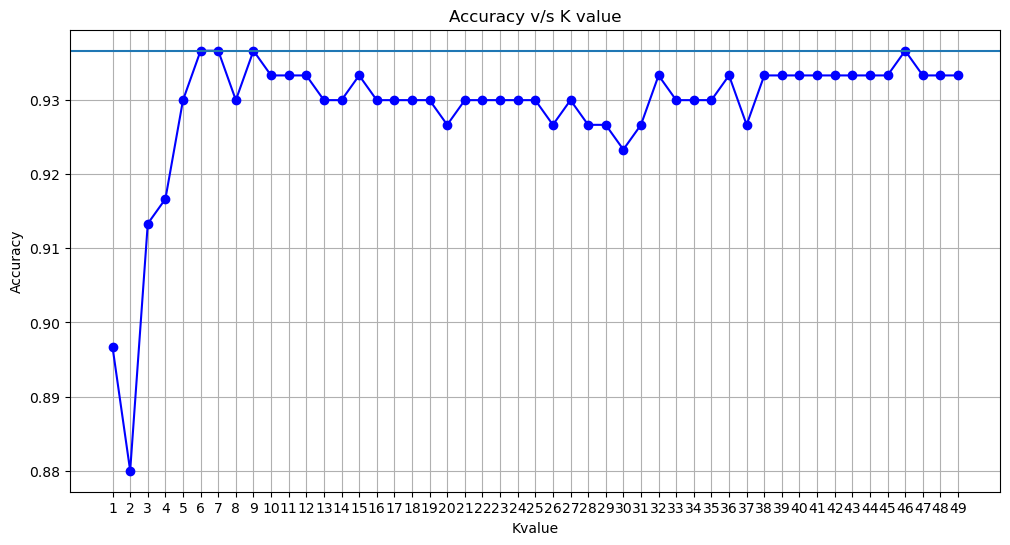

In [62]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(range(1,50), k_acc, color='blue', marker='o')
ax.axhline(y=k_acc[6])
ax.set_title("Accuracy v/s K value")
ax.grid(True)
ax.set_xlabel("Kvalue")
ax.set_ylabel("Accuracy")
ax.set_xticks(range(1,50))
fig.savefig("Accuracy_vs_Kvalue.png")


In [74]:
print(confusion_matrix(pred[45], y_test))
print("\n")
print(classification_report(pred[45], y_test))

[[128   7]
 [ 12 153]]


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       135
           1       0.96      0.93      0.94       165

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [75]:
print(confusion_matrix(pred[5], y_test))
print("\n")
print(classification_report(pred[5], y_test))

[[131  10]
 [  9 150]]


              precision    recall  f1-score   support

           0       0.94      0.93      0.93       141
           1       0.94      0.94      0.94       159

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [76]:
print(confusion_matrix(pred[6], y_test))
print("\n")
print(classification_report(pred[6], y_test))

[[129   8]
 [ 11 152]]


              precision    recall  f1-score   support

           0       0.92      0.94      0.93       137
           1       0.95      0.93      0.94       163

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

